# Heart Disease classification - SVM

## Importing libraries
#### Other libraries will be imported when required

In [1]:
import pandas as pd
import numpy as np

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('seaborn-darkgrid')
plt.rcParams['font.size']=12

**Reading Data**

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Data Exploration**


**This notebook is mainly concentrated on SVM claiisifcation, so added few basic plots**

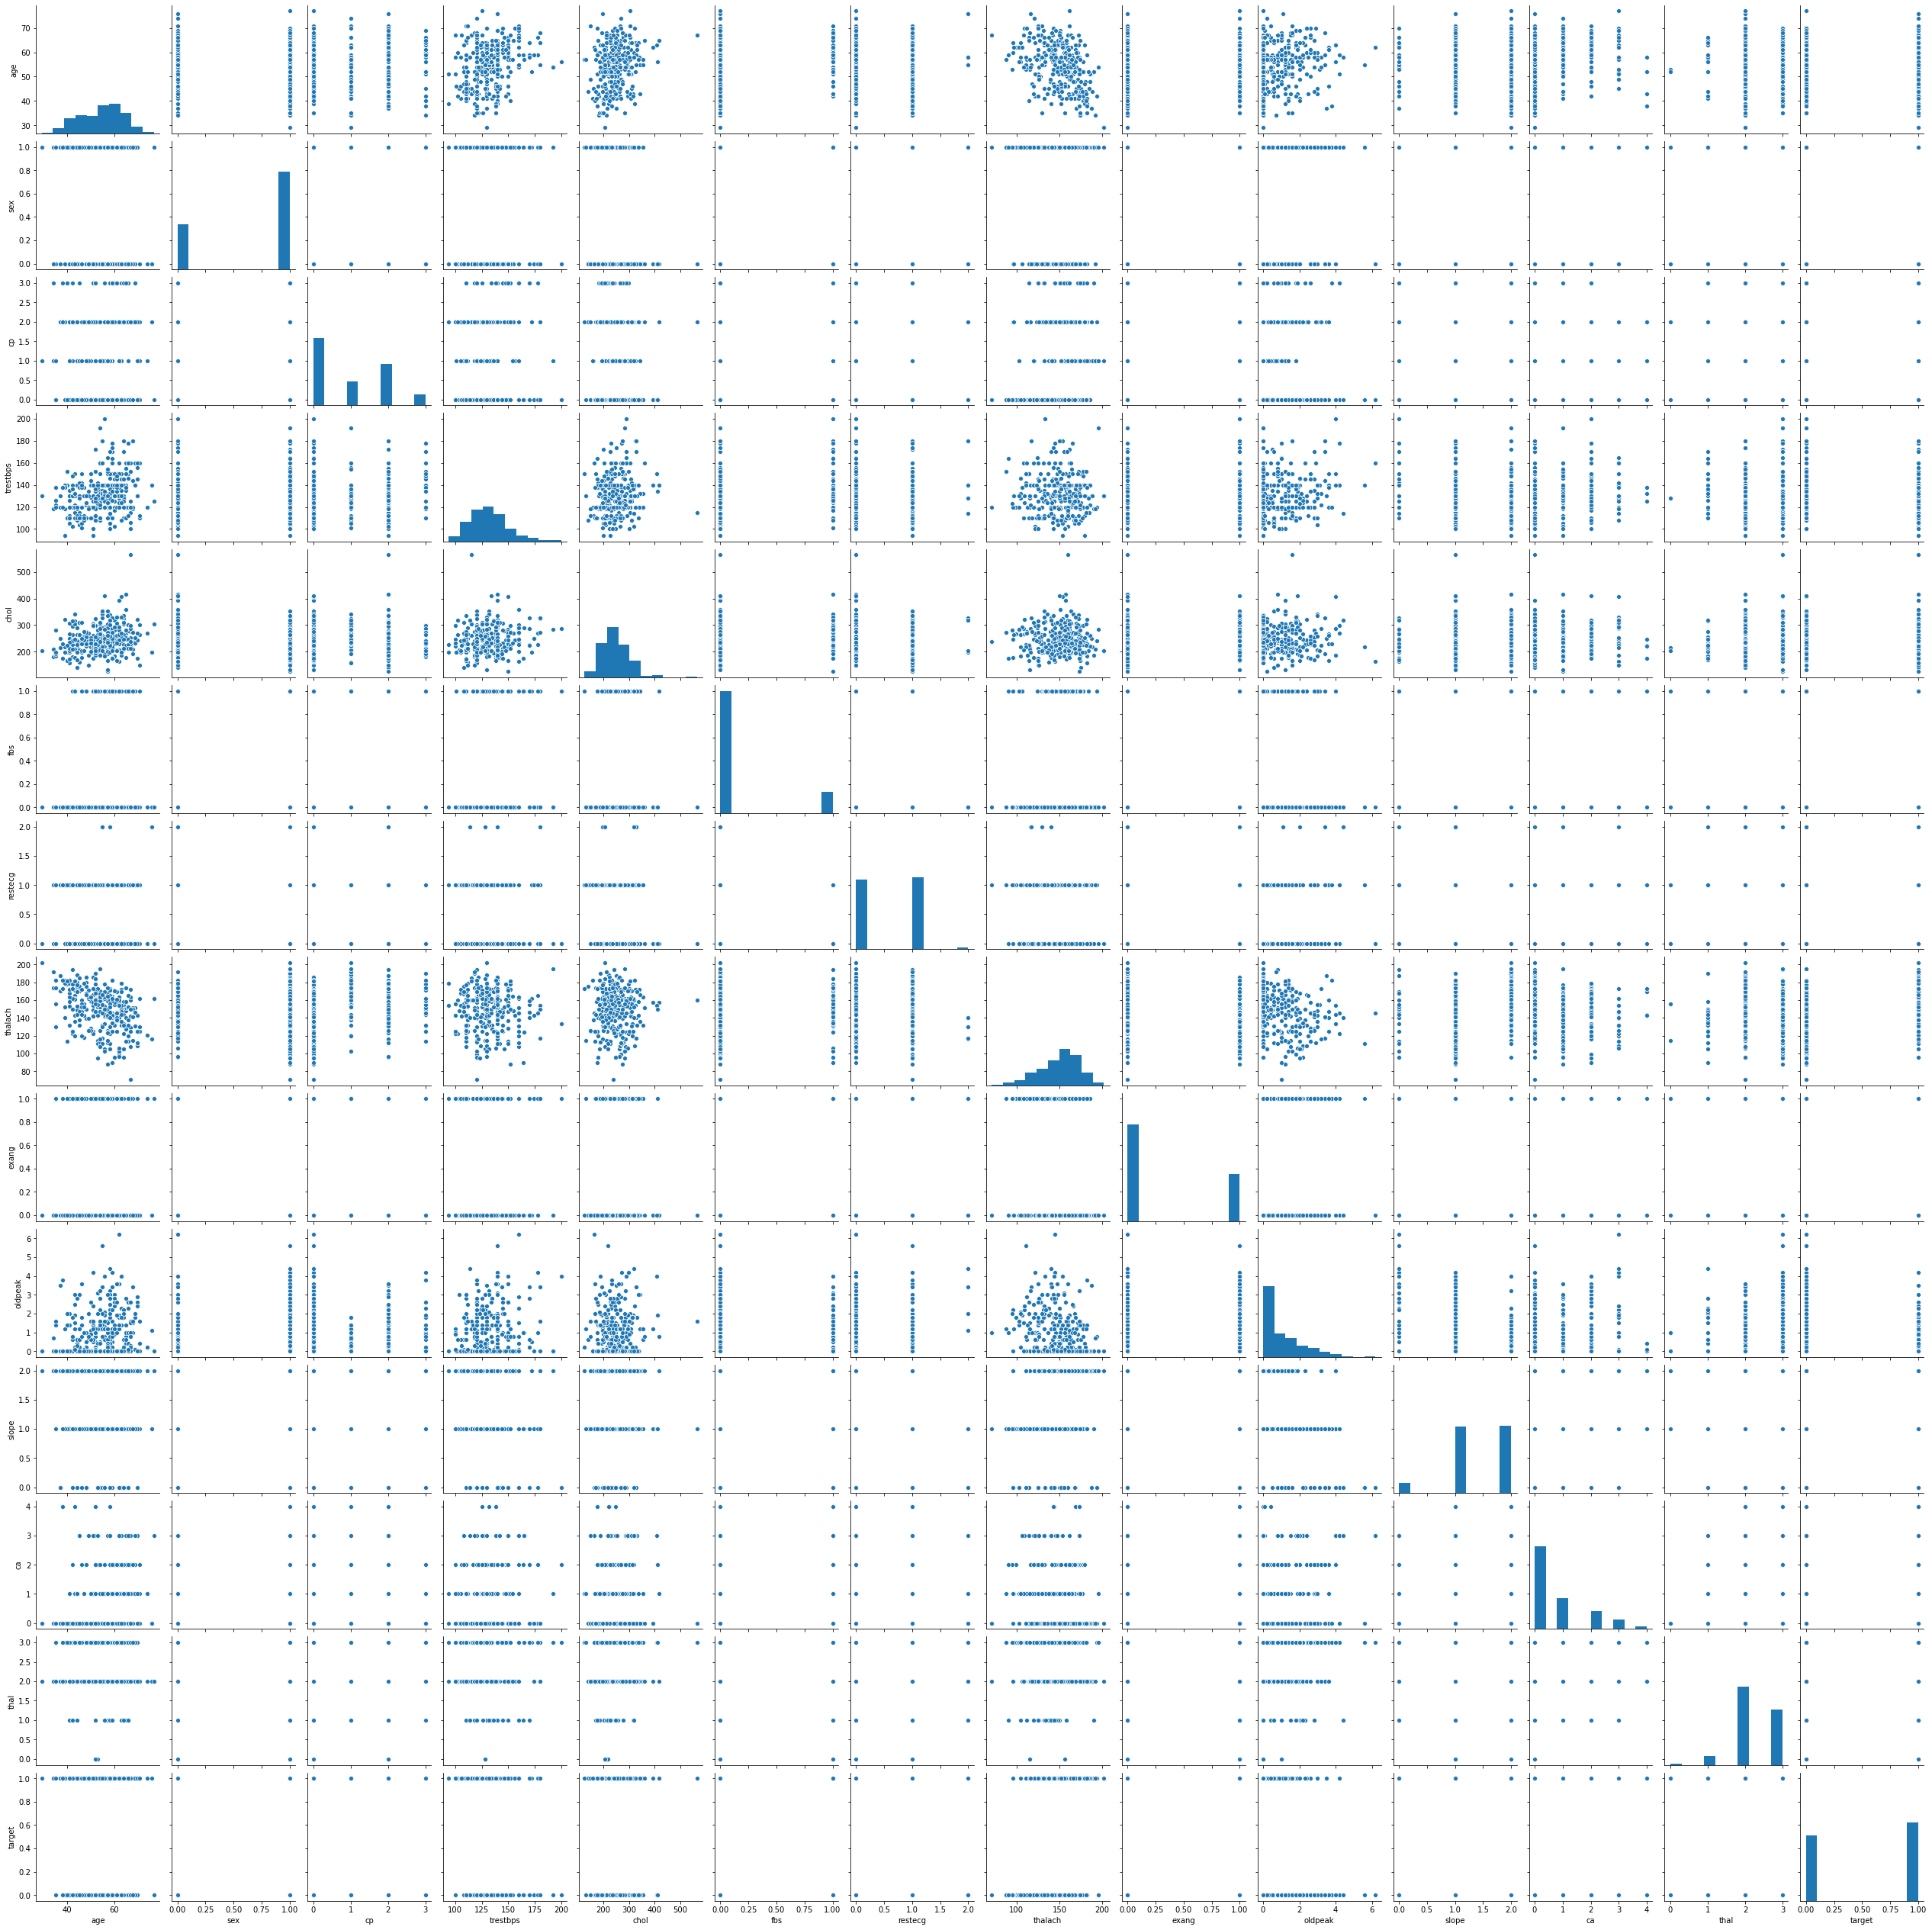

In [5]:
sns.pairplot(df, diag_kind='hist')

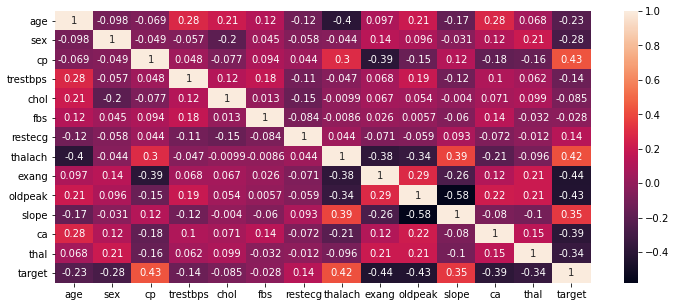

In [15]:
sns.heatmap(df.corr(), annot=True, cbar=True)

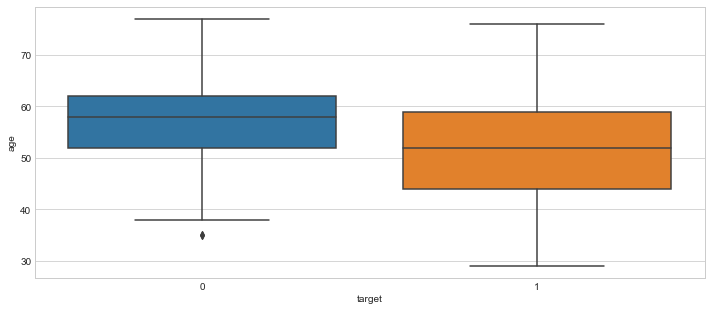

In [27]:
sns.boxplot('target', 'age', data=df)

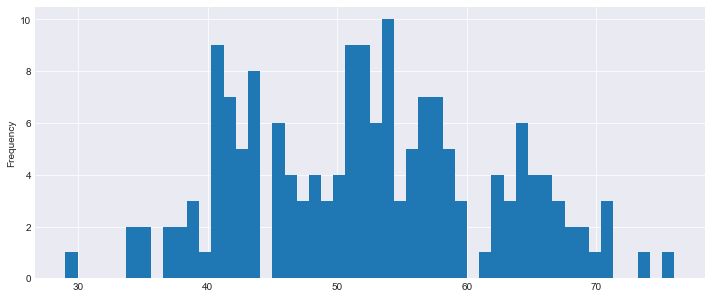

In [29]:
df[df['target']==1]['age'].plot(kind='hist', bins=50)

## Creating model for SVM classification


***Here I have not performed feature engineering, using the data as it is***

***Feature Engineering is performed after observing the result from below model***

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
pred = svc.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.46      0.58        41
           1       0.67      0.90      0.77        50

    accuracy                           0.70        91
   macro avg       0.73      0.68      0.68        91
weighted avg       0.73      0.70      0.69        91



In [38]:
print(confusion_matrix(y_test, pred))

[[19 22]
 [ 5 45]]


**Acuracy and Specificity is not satisfactory, so will user GridSearchCV**

In [39]:
## Using gridsearchcv

In [40]:
from sklearn.model_selection import GridSearchCV

In [45]:
param = {'C': [0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.001, 0.001], 'kernel': [ 'rbf']}

grid = GridSearchCV(SVC(), param_grid=param, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.001, 0.001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [49]:
grid_pred = grid.predict(X_test)

In [50]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63        41
           1       0.69      0.68      0.69        50

    accuracy                           0.66        91
   macro avg       0.66      0.66      0.66        91
weighted avg       0.66      0.66      0.66        91



**still the accuracy is low, will proceed with feature engineering**

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
## Renaming columns

df.columns = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'ecg', 'max_heart_rate',
       'Exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels', 'thalassemia', 'target']

In [55]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg,max_heart_rate,Exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [270]:
##Change the values of the categorical variables

In [66]:
df.loc[df['sex']==1, 'sex']='male'
df.loc[df['sex']==0, 'sex']='female'

In [71]:
df.loc[df['chest_pain'] == 1, 'chest_pain'] = 'typical angina'
df.loc[df['chest_pain'] == 2, 'chest_pain'] = 'atypical angina'
df.loc[df['chest_pain'] == 3, 'chest_pain'] = 'non-anginal pain'
df.loc[df['chest_pain'] == 4, 'chest_pain'] = 'asymptomatic'

In [88]:
df.corr()['target'][abs(df.corr()['target'])>0.1].sort_values(ascending=False)

target                     1.000000
max_heart_rate             0.421741
st_slope                   0.345877
ecg                        0.137230
resting_blood_pressure    -0.144931
age                       -0.225439
thalassemia               -0.344029
major_vessels             -0.391724
st_depression             -0.430696
Exercise_induced_angina   -0.436757
Name: target, dtype: float64

In [89]:
df.loc[df['fasting_blood_sugar'] == 0, 'fasting_blood_sugar'] = 'lower than 120mg/ml'
df.loc[df['fasting_blood_sugar'] == 1, 'fasting_blood_sugar'] = 'greater than 120mg/ml'

In [90]:
df.loc[df['ecg'] == 0, 'ecg'] = 'normal'
df.loc[df['ecg'] == 1, 'ecg'] = 'ST-T wave abnormality'
df.loc[df['ecg'] == 2, 'ecg'] = 'left ventricular hypertrophy'

In [91]:
df.loc[df['Exercise_induced_angina'] == 0, 'Exercise_induced_angina'] = 'no'
df.loc[df['Exercise_induced_angina'] == 1, 'Exercise_induced_angina'] = 'yes'

In [92]:
df.loc[df['st_slope']==1, 'st_slope'] = 'upsloping'
df.loc[df['st_slope']==2, 'st_slope'] = 'flat'
df.loc[df['st_slope']==3, 'st_slope'] = 'downsloping'

In [93]:
df.loc[df['thalassemia'] == 1, 'thalassemia'] = 'normal'
df.loc[df['thalassemia'] == 2, 'thalassemia'] = 'fixed defect'
df.loc[df['thalassemia'] == 3, 'thalassemia'] = 'reversable defect'

In [95]:
df['chest_pain'].value_counts()

0                   143
atypical angina      87
typical angina       50
non-anginal pain     23
Name: chest_pain, dtype: int64

In [96]:
df.loc[df['chest_pain'] == 0, 'chest_pain'] = 'asymptomatic'

In [97]:
df['chest_pain'].value_counts()

asymptomatic        143
atypical angina      87
typical angina       50
non-anginal pain     23
Name: chest_pain, dtype: int64

In [98]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg,max_heart_rate,Exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,asymptomatic,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [100]:
df.corr()['target'][abs(df.corr()['target'])>0.1].sort_values(ascending=False)

target                    1.000000
max_heart_rate            0.421741
resting_blood_pressure   -0.144931
age                      -0.225439
major_vessels            -0.391724
st_depression            -0.430696
Name: target, dtype: float64

In [271]:
## Function for value counts

In [103]:
def value_count(df, feature):
    """
    for value counts
    """
    count = df[feature].value_counts()
    return count

In [111]:
value_count(df, 'st_slope')

flat         142
upsloping    140
0             21
Name: st_slope, dtype: int64

In [112]:
df.loc[df['st_slope']==0, 'st_slope'] = 'downsloping'

In [113]:
value_count(df, 'thalassemia')

fixed defect         166
reversable defect    117
normal                18
0                      2
Name: thalassemia, dtype: int64

In [116]:
df[df['thalassemia']==0]

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg,max_heart_rate,Exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target
48,53,female,atypical angina,128,216,lower than 120mg/ml,normal,115,no,0.0,flat,0,0,1
281,52,male,asymptomatic,128,204,greater than 120mg/ml,ST-T wave abnormality,156,yes,1.0,upsloping,0,0,0


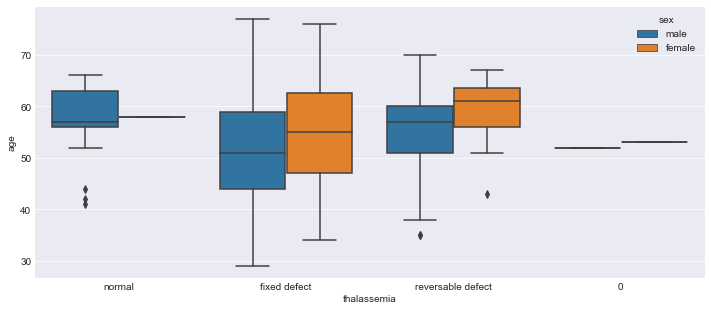

In [131]:
sns.boxplot('thalassemia', 'age', hue='sex', data=df)

In [137]:
df[(df['sex']=='female') & (df['age']>=50) & (df['age']<=60)]

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg,max_heart_rate,Exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target
4,57,female,asymptomatic,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1
6,56,female,typical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,upsloping,0,fixed defect,1
14,58,female,non-anginal pain,150,283,greater than 120mg/ml,normal,162,no,1.0,flat,0,fixed defect,1
15,50,female,atypical angina,120,219,lower than 120mg/ml,ST-T wave abnormality,158,no,1.6,upsloping,0,fixed defect,1
16,58,female,atypical angina,120,340,lower than 120mg/ml,ST-T wave abnormality,172,no,0.0,flat,0,fixed defect,1
36,54,female,atypical angina,135,304,greater than 120mg/ml,ST-T wave abnormality,170,no,0.0,flat,0,fixed defect,1
40,51,female,atypical angina,140,308,lower than 120mg/ml,normal,142,no,1.5,flat,1,fixed defect,1
43,53,female,asymptomatic,130,264,lower than 120mg/ml,normal,143,no,0.4,upsloping,0,fixed defect,1
48,53,female,atypical angina,128,216,lower than 120mg/ml,normal,115,no,0.0,flat,0,0,1
49,53,female,asymptomatic,138,234,lower than 120mg/ml,normal,160,no,0.0,flat,0,fixed defect,1


In [146]:
df.loc[48, 'thalassemia'] = 'fixed defect'

In [153]:
df[(df['sex']=='male') & (df['age']>=45) & (df['age']<=60) & (df['chest_pain']=='asymptomatic')&(df['fasting_blood_sugar']=='greater than 120mg/ml')]

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg,max_heart_rate,Exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target
97,52,male,asymptomatic,108,233,greater than 120mg/ml,ST-T wave abnormality,147,no,0.1,flat,3,reversable defect,1
169,53,male,asymptomatic,140,203,greater than 120mg/ml,normal,155,yes,3.1,downsloping,0,reversable defect,0
176,60,male,asymptomatic,117,230,greater than 120mg/ml,ST-T wave abnormality,160,yes,1.4,flat,2,reversable defect,0
214,56,male,asymptomatic,125,249,greater than 120mg/ml,normal,144,yes,1.2,upsloping,1,fixed defect,0
219,48,male,asymptomatic,130,256,greater than 120mg/ml,normal,150,yes,0.0,flat,2,reversable defect,0
231,57,male,asymptomatic,165,289,greater than 120mg/ml,normal,124,no,1.0,upsloping,3,reversable defect,0
269,56,male,asymptomatic,130,283,greater than 120mg/ml,normal,103,yes,1.6,downsloping,0,reversable defect,0
281,52,male,asymptomatic,128,204,greater than 120mg/ml,ST-T wave abnormality,156,yes,1.0,upsloping,0,0,0
297,59,male,asymptomatic,164,176,greater than 120mg/ml,normal,90,no,1.0,upsloping,2,normal,0


In [155]:
df.loc[281, 'thalassemia']= 'reversable defect'

In [156]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg,max_heart_rate,Exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,downsloping,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,downsloping,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,asymptomatic,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


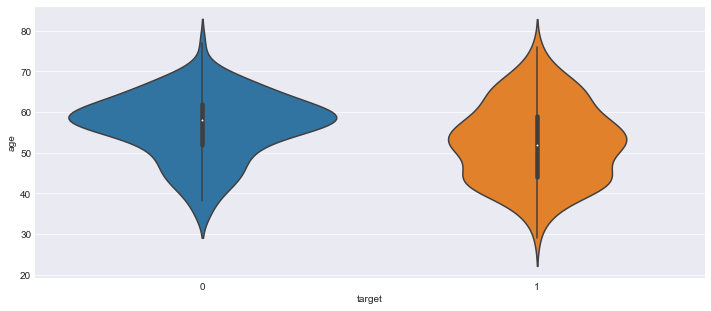

In [157]:
sns.violinplot('target', 'age', data=df)

In [164]:
def age_group(col):
    """
    Grouping age
    """
    
    if col<=30:
        return 'young'
    elif col<=40:
        return 'adult'
    elif col<=55:
        return 'middle aged'
    elif col<=65:
        return 'senior citizen'
    else:
        return 'old'

In [166]:
df['age_group'] = df['age'].apply(age_group)

In [167]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg,max_heart_rate,Exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target,age_group
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,downsloping,0,normal,1,senior citizen
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,downsloping,0,fixed defect,1,adult
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1,middle aged
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1,senior citizen
4,57,female,asymptomatic,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1,senior citizen


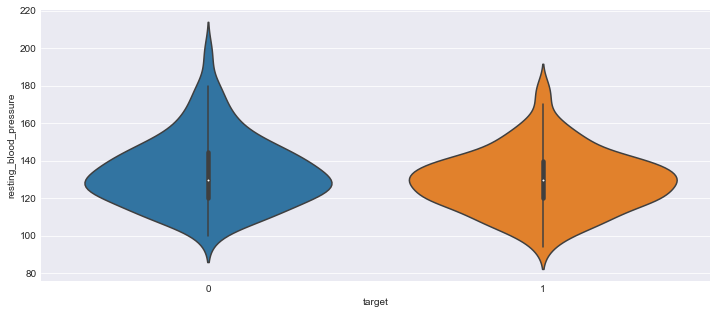

In [171]:
sns.violinplot('target', 'resting_blood_pressure', data=df)

In [173]:
## Grouping blood pressure

def blood_pressure_group(col):
    """
    Grouping blood pressure
    """
    
    if col<=120:
        return 'normal'
    elif col<=129:
        return 'elevated'
    elif col<=139:
        return 'high bp stg1'
    elif col<=180:
        return 'high bp stg2'
    else:
        return 'hipertensive crisis'

In [178]:
df['blood_pressure_group'] = df['resting_blood_pressure'].apply(blood_pressure_group)

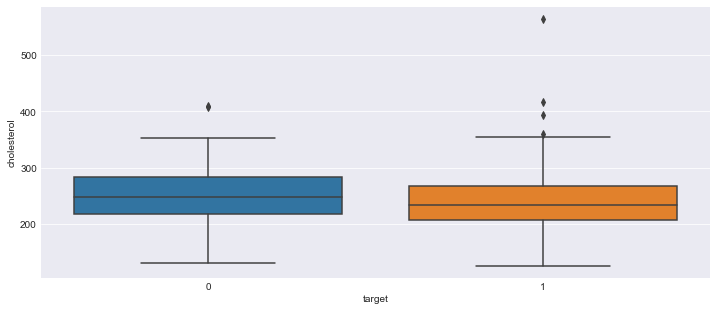

In [182]:
sns.boxplot('target', 'cholesterol', data = df)

In [183]:
## grouping cholesterol

def cholesterol_group(col):
    if col<=200:
        return 'desirable'
    elif col<=240:
        return 'moderate risk'
    else:
        return 'high risk'

In [190]:
df['cholesterol_group'] = df['cholesterol'].apply(cholesterol_group)

In [191]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg,max_heart_rate,Exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target,age_group,blood_pressure_group,cholesterol_group
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,downsloping,0,normal,1,senior citizen,high bp stg2,moderate risk
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,downsloping,0,fixed defect,1,adult,high bp stg1,high risk
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1,middle aged,high bp stg1,moderate risk
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1,senior citizen,normal,moderate risk
4,57,female,asymptomatic,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1,senior citizen,normal,high risk


In [204]:
## taking copy of df

df_final = df.copy()

In [205]:
df_final.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg,max_heart_rate,Exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target,age_group,blood_pressure_group,cholesterol_group
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,downsloping,0,normal,1,senior citizen,high bp stg2,moderate risk
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,downsloping,0,fixed defect,1,adult,high bp stg1,high risk
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1,middle aged,high bp stg1,moderate risk
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1,senior citizen,normal,moderate risk
4,57,female,asymptomatic,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1,senior citizen,normal,high risk


In [272]:
## Creating dummy variables

In [209]:
df_final = pd.get_dummies(df_final, drop_first=True)

In [212]:
df_final

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,major_vessels,target,sex_male,chest_pain_atypical angina,chest_pain_non-anginal pain,...,age_group_middle aged,age_group_old,age_group_senior citizen,age_group_young,blood_pressure_group_high bp stg1,blood_pressure_group_high bp stg2,blood_pressure_group_hipertensive crisis,blood_pressure_group_normal,cholesterol_group_high risk,cholesterol_group_moderate risk
0,63,145,233,150,2.3,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,1
1,37,130,250,187,3.5,0,1,1,1,0,...,0,0,0,0,1,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,56,120,236,178,0.8,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1
4,57,120,354,163,0.6,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
299,45,110,264,132,1.2,0,0,1,0,1,...,1,0,0,0,0,0,0,1,1,0
300,68,144,193,141,3.4,2,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
301,57,130,131,115,1.2,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


**Spliting the 70% of the data into train and 30% of the data into test**

In [213]:
X = df_final.drop('target', axis=1)
y = df_final['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Standardization of a dataset**

In [214]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

In [215]:
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.fit_transform(X_test)

**Using GridSearchCV**

In [231]:
## Using gridsearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.001], 'kernel':['rbf']}
grid2 = GridSearchCV(SVC(), param_grid= param_grid, cv=10, n_jobs=-1)
grid2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [232]:
pred2 = grid2.predict(X_test)

In [233]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.87      0.90      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



In [235]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.8296536796536798
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [237]:
print(confusion_matrix(y_test, pred2))

[[34  7]
 [ 5 45]]


**ROC curve**

In [238]:
from sklearn.metrics import roc_curve, auc

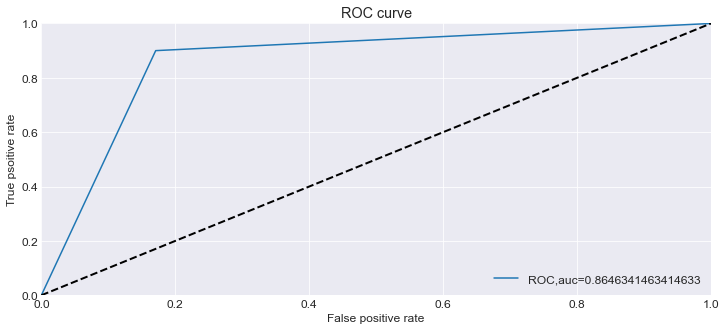

In [269]:
fpr, tpr, treshold = roc_curve(y_test, pred2)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, label="ROC,auc="+str(auc(fpr, tpr)))
ax.plot([0,1], [0,1], ls='--', lw=2, color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True psoitive rate')
plt.title('ROC curve')
plt.legend(loc=4)

**Calculating Sensitivity and Specificity**

**Sensitivity=TruePositives/(TruePositives+FalseNegatives)**

In [278]:
print('Sensitivity: ', 45/(45+5))

Sensitivity:  0.9


**Specificity=TrueNegatives/(TrueNegatives+FalsePositives)**

In [279]:
print('Specificity: ', 34/(34+7))

Specificity:  0.8292682926829268


## Accuracy, AUC, Sensitivity and Specificity looks fine, so model is working fine

# Thank you